In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:
df_weather = pd.read_csv("Data/Weather/weather_data.csv")
df_weather = df_weather.drop(columns=['    Y', '    O', '    S', '    R', '    M', '   WW', '    N', '   VV', '    P', 'Unnamed: 0', '  STN', '   IX'])
df_weather = df_weather.rename(columns={"YYYYMMDD": "Date", '   HH':"HH"})
df_weather = df_weather.drop(0).reset_index()
df_weather = df_weather.drop(columns=['index'])
print(df_weather)

       Unnamed: 0    STN  YYYYMMDD     HH     DD     FH     FF     FX      T  \
0               0    278  20180801      1    100      0     10     10    125   
1               1    278  20180801      2      0      0      0     10    127   
2               2    278  20180801      3      0      0      0     10    124   
3               3    278  20180801      4    230      0     10     20    116   
4               4    278  20180801      5     80      0     10     10    133   
...           ...    ...       ...    ...    ...    ...    ...    ...    ...   
18283       18283    278  20200831     20    330     10     10     30    138   
18284       18284    278  20200831     21     40     10     10     20    129   
18285       18285    278  20200831     22    280     10     10     20    124   
18286       18286    278  20200831     23    250     10     10     20    112   
18287       18287    278  20200831     24    230     10     10     20     97   

        T10N  ...     VV      N      U 

In [3]:
df = pd.read_csv("Data/Houses/Houses39-57/House50-1m.csv")
df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')
df

,timestamp,house,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW
0,2018-08-01 02:00:00+02:00,House50,0.0,0.12,NaN,0.12,NaN
1,2018-08-01 02:01:00+02:00,House50,0.0,0.12,NaN,0.12,NaN
2,2018-08-01 02:02:00+02:00,House50,0.0,0.12,NaN,0.12,NaN
3,2018-08-01 02:03:00+02:00,House50,0.0,0.12,NaN,0.12,NaN
4,2018-08-01 02:04:00+02:00,House50,0.0,0.06,NaN,0.06,NaN
...,...,...,...,...,...,...,...
1097154,2020-08-31 23:54:00+02:00,House50,0.0,0.06,0.0,0.06,0.06
1097155,2020-08-31 23:55:00+02:00,House50,0.0,0.06,0.0,0.06,0.06
1097156,2020-08-31 23:56:00+02:00,House50,0.0,0.06,0.0,0.06,0.06
1097157,2020-08-31 23:57:00+02:00,House50,0.0,0.06,0.0,0.06,0.06


In [4]:

df['HH'] = df['timestamp'].dt.hour
df['Date'] = df['timestamp'].dt.date
df['Minute'] = df['timestamp'].dt.minute
df['Time'] = df['HH'].astype(str) + ":" + df['Minute'].astype(str)
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d").astype(int)
df

,timestamp,house,EXPORT_KW,IMPORT_KW,PV_KW,TOTAL_KW,UNC_KW,HH,Date,Minute,Time
0,2018-08-01 02:00:00+02:00,House50,0.0,0.12,NaN,0.12,NaN,2,20180801,0,2:0
1,2018-08-01 02:01:00+02:00,House50,0.0,0.12,NaN,0.12,NaN,2,20180801,1,2:1
2,2018-08-01 02:02:00+02:00,House50,0.0,0.12,NaN,0.12,NaN,2,20180801,2,2:2
3,2018-08-01 02:03:00+02:00,House50,0.0,0.12,NaN,0.12,NaN,2,20180801,3,2:3
4,2018-08-01 02:04:00+02:00,House50,0.0,0.06,NaN,0.06,NaN,2,20180801,4,2:4
...,...,...,...,...,...,...,...,...,...,...,...
1097154,2020-08-31 23:54:00+02:00,House50,0.0,0.06,0.0,0.06,0.06,23,20200831,54,23:54
1097155,2020-08-31 23:55:00+02:00,House50,0.0,0.06,0.0,0.06,0.06,23,20200831,55,23:55
1097156,2020-08-31 23:56:00+02:00,House50,0.0,0.06,0.0,0.06,0.06,23,20200831,56,23:56
1097157,2020-08-31 23:57:00+02:00,House50,0.0,0.06,0.0,0.06,0.06,23,20200831,57,23:57


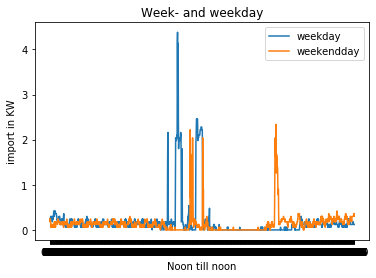

In [5]:
day20190815= df[df['Date']==20190815]
day20190812= df[df['Date']==20190812]
plt.plot(day20190815['Time'],day20190815['IMPORT_KW'], label = 'weekday')
plt.plot(day20190812['Time'],day20190812['IMPORT_KW'], label = 'weekendday')
plt.legend()
plt.ylabel('import in KW')
plt.xlabel('Noon till noon')
plt.title('Week- and weekday')
plt.show()

Text(0.5, 1.0, 'Mean, Maximum and Minimum import in the 14th week of april')

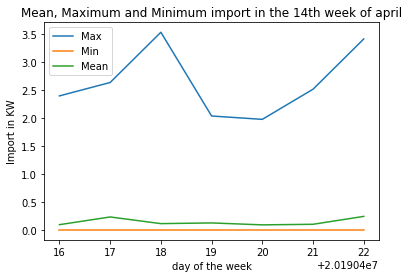

In [6]:
week14 = df[(df['Date'] >= 20190416) & (df['Date'] <= 20190422)]
week14_max = week14.groupby(['Date'])['IMPORT_KW'].max()
week14_min = week14.groupby(['Date'])['IMPORT_KW'].min()
week14_mean = week14.groupby(['Date'])['IMPORT_KW'].mean()
        
plt.plot(week14_max, label = "Max")
plt.plot(week14_min, label = 'Min')
plt.plot(week14_mean, label = 'Mean')
plt.legend()
plt.ylabel('Import in KW')
plt.xlabel('day of the week')
plt.title('Mean, Maximum and Minimum import in the 14th week of april')

In [7]:
date = df.groupby(['Date', 'HH'])['TOTAL_KW', 'IMPORT_KW', 'EXPORT_KW', 'UNC_KW'].mean().reset_index()
date

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Date,HH,TOTAL_KW,IMPORT_KW,EXPORT_KW,UNC_KW
0,20180801,2,0.154000,0.154000,0.0,NaN
1,20180801,3,0.148000,0.148000,0.0,NaN
2,20180801,4,0.157000,0.157000,0.0,NaN
3,20180801,5,0.140000,0.140000,0.0,NaN
4,20180801,6,0.154000,0.154000,0.0,NaN
...,...,...,...,...,...,...
18281,20200831,19,0.151000,0.151000,0.0,0.168000
18282,20200831,20,0.184000,0.184000,0.0,0.184000
18283,20200831,21,0.303000,0.303000,0.0,0.303000
18284,20200831,22,0.249000,0.249000,0.0,0.249000


In [8]:
result = pd.merge(df_weather, date, on=["Date", "HH"])
result

,Date,HH,DD,FH,FF,FX,T,T10N,TD,SQ,Q,DR,RH,U,TOTAL_KW,IMPORT_KW,EXPORT_KW,UNC_KW
0,20180801,2,0,0,0,10,127,,125,0,0,0,0,98,0.154000,0.154000,0.0,NaN
1,20180801,3,0,0,0,10,124,,123,0,0,0,0,99,0.148000,0.148000,0.0,NaN
2,20180801,4,230,0,10,20,116,,112,0,0,0,0,97,0.157000,0.157000,0.0,NaN
3,20180801,5,80,0,10,10,133,,131,5,15,0,0,98,0.140000,0.140000,0.0,NaN
4,20180801,6,0,10,0,10,153,80,143,4,41,0,0,93,0.154000,0.154000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17520,20200831,19,320,10,10,30,149,,100,0,1,0,0,72,0.151000,0.151000,0.0,0.168000
17521,20200831,20,330,10,10,30,138,,101,0,0,0,0,78,0.184000,0.184000,0.0,0.184000
17522,20200831,21,40,10,10,20,129,,102,0,0,0,0,83,0.303000,0.303000,0.0,0.303000
17523,20200831,22,280,10,10,20,124,,103,0,0,0,0,86,0.249000,0.249000,0.0,0.249000


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [10]:
X = result[['   SQ', '    Q', '    T']].values
y = result['EXPORT_KW'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# min_max_scaler = MinMaxScaler(feature_range=(0,1))
# X_train_min_max = min_max_scaler.fit_transform(X_train)
# # X_test_min_max = min_max_scaler.fit_transform(X_test)

# poly = PolynomialFeatures(degree=2)
# poly.fit(X_train_min_max)
# X_train_poly_2 = poly.transform(X_train_min_max)


In [11]:
def polynomial(X, degree):
    poly = PolynomialFeatures(degree) 
    poly.fit(X)
    X_poly = poly.transform(X)
    return X_poly

def rmse(y_true, y_pred):
    RMSE = 0
    for prediction, true in zip(y_pred, y_true):
        RMSE += (true - prediction)**2
    
    return (RMSE/len(y_true))**0.5


import matplotlib.pyplot as plt

# Generate polynomial dataset (both training and test) of degrees 1, 2, 3, 4, 5
poly_train =[]
poly_test=[]
for degree in [4]:
    poly_train.append(polynomial(X_train, degree))
    
for degree in [4]:
    poly_test.append(polynomial(X_test, degree))
    


# Scale all features using the RobustScaler
poly_train_scaled =[]
poly_test_scaled=[]

for item in poly_train:
    scaler = RobustScaler().fit(item)
    poly_train_scaled.append(scaler.transform(item))
    
for item in poly_test:
    scaler = RobustScaler().fit(item)
    poly_test_scaled.append(scaler.transform(item))
    

# Compute and print RMSE using your code above on the training set and on the test set
test_rmse = []
train_rmse = []

for x, x_test in zip(poly_train_scaled, poly_test_scaled):
    lr = LinearRegression().fit(x, Y_train)
    Y_poly_pred_train = lr.predict(x)
    
    Y_poly_pred_test = lr.predict(x_test)
    train_rmse.append(rmse(Y_train, Y_poly_pred_train))
    test_rmse.append(rmse(Y_test, Y_poly_pred_test))

print('RMSE for the training set from degree 4 is: ', train_rmse)
print('RMSE for the test set from degree 4 is: ', test_rmse)


RMSE for the training set from degree 4 is:  [array([0.17425771])]
RMSE for the test set from degree 4 is:  [array([0.20669317])]


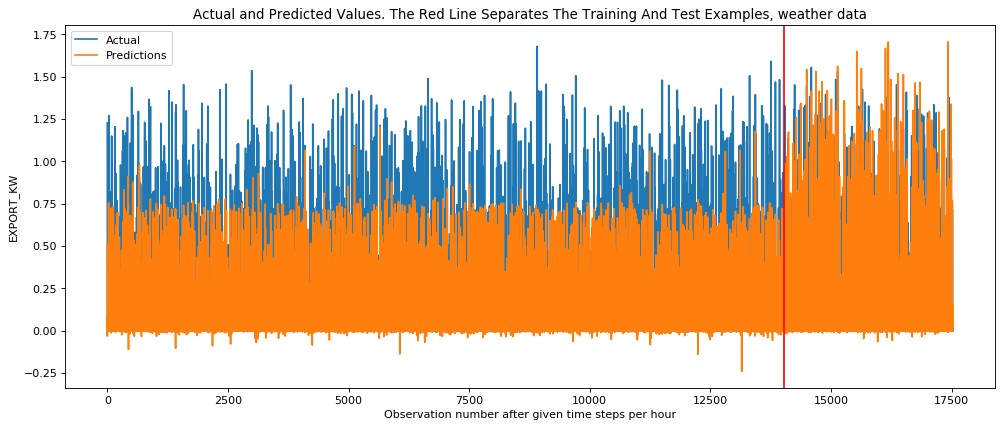

In [12]:

def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps per hour')
    plt.ylabel('EXPORT_KW')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples, weather data')
    
plot_result( Y_train, Y_test, Y_poly_pred_train, Y_poly_pred_test)

In [13]:
result = result.groupby(np.arange(len(result))//5).mean()
result

,Date,HH,DD,FH,FF,FX,T,TD,SQ,Q,DR,RH,U,TOTAL_KW,IMPORT_KW,EXPORT_KW,UNC_KW
0,20180801.0,4.0,62.0,2.0,4.0,12.0,130.6,126.8,1.8,11.2,0.0,0.0,97.0,0.150600,0.150600,0.0000,NaN
1,20180801.0,9.0,356.0,14.0,16.0,36.0,224.0,131.2,8.0,186.2,0.0,0.0,57.2,0.115200,0.226400,0.1112,NaN
2,20180801.0,14.0,414.0,18.0,18.0,42.0,267.2,117.0,5.8,208.0,0.0,0.0,38.8,-0.615000,0.000400,0.6154,NaN
3,20180801.0,19.0,268.0,14.0,16.0,42.0,225.8,132.2,4.0,38.0,0.0,0.0,56.4,0.217400,0.409200,0.1918,NaN
4,20180801.6,10.2,198.0,4.0,2.0,16.0,149.4,137.2,0.0,0.0,0.0,0.0,92.0,0.247600,0.247600,0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500,20200830.6,10.2,324.0,16.0,18.0,38.0,143.2,122.6,0.0,0.0,0.0,0.0,87.0,0.157000,0.157000,0.0000,0.157000
3501,20200831.0,6.0,310.0,14.0,12.0,34.0,141.4,111.0,0.0,19.4,0.0,0.0,81.6,0.116800,0.119000,0.0022,0.132400
3502,20200831.0,11.0,344.0,24.0,28.0,54.0,173.0,101.6,3.6,145.2,0.0,0.0,62.6,0.621600,0.663800,0.0422,0.867800
3503,20200831.0,16.0,328.0,22.0,18.0,42.0,168.8,95.6,4.4,82.0,0.0,0.0,61.6,-0.097000,0.069200,0.1662,0.244600


In [14]:
Y_pred_5_minutes = []
for item in Y_poly_pred_train:
    for i in range(5):
        Y_pred_5_minutes.append(item)

Y_actual_5_minutes = result['EXPORT_KW']
print(len(Y_actual_5_minutes))
print(len(Y_pred_5_minutes))
    

print(rmse(Y_actual_5_minutes, Y_pred_5_minutes))

3505
70100
[0.29123784]


In [15]:
corr = result.corr()
corr = corr.style.background_gradient(cmap='coolwarm')
corr

,Date,HH,DD,FH,FF,FX,T,TD,SQ,Q,DR,RH,U,TOTAL_KW,IMPORT_KW,EXPORT_KW,UNC_KW
Date,1.000000,0.000550,0.047859,0.101976,0.104537,0.104468,0.050108,-0.032014,0.073891,0.128331,-0.016847,0.003161,-0.150716,-0.063529,-0.002385,0.078096,0.072406
HH,0.000550,1.000000,0.039302,0.058460,0.029655,0.091944,0.135441,0.039506,0.037929,0.007849,0.007860,0.047920,-0.208902,-0.089759,0.143012,0.180902,0.246580
DD,0.047859,0.039302,1.000000,0.125154,0.119621,0.169251,0.184273,0.194523,0.064280,0.165485,0.082080,0.067237,-0.060919,-0.095313,-0.044257,0.097560,0.053478
FH,0.101976,0.058460,0.125154,1.000000,0.987435,0.974364,0.021418,-0.121724,0.093141,0.155739,0.202956,0.136216,-0.275623,-0.109709,-0.077275,0.099600,-0.009666
FF,0.104537,0.029655,0.119621,0.987435,1.000000,0.967508,0.021294,-0.117681,0.098080,0.165218,0.200866,0.131285,-0.269132,-0.101516,-0.080495,0.087829,-0.018172
FX,0.104468,0.091944,0.169251,0.974364,0.967508,1.000000,0.067886,-0.077225,0.100209,0.172730,0.228447,0.181937,-0.296173,-0.128895,-0.075722,0.124281,0.015212
T,0.050108,0.135441,0.184273,0.021418,0.021294,0.067886,1.000000,0.854113,0.466530,0.583971,-0.070966,0.012320,-0.548339,-0.484424,-0.125998,0.543531,0.324554
TD,-0.032014,0.039506,0.194523,-0.121724,-0.117681,-0.077225,0.854113,1.000000,0.097946,0.220457,0.080537,0.121185,-0.041732,-0.167248,-0.029165,0.194565,0.211029
SQ,0.073891,0.037929,0.064280,0.093141,0.098080,0.100209,0.466530,0.097946,1.000000,0.836703,-0.239600,-0.147309,-0.729152,-0.586035,-0.205775,0.631825,0.211864
Q,0.128331,0.007849,0.165485,0.155739,0.165218,0.172730,0.583971,0.220457,0.836703,1.000000,-0.181665,-0.101454,-0.755773,-0.693865,-0.271511,0.734643,0.265263
